In [1]:
images=[]
labels=[]

In [2]:
import os
import cv2

In [3]:
os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset/")

['without_mask', 'with_mask']

In [4]:
import cv2

In [5]:
for i in ['without_mask', 'with_mask']:
    imageNameList=os.listdir("C:/Users/Lenovo/OneDrive/Documents/dataset/" + str(i))
    for fileName in imageNameList:
        Image=cv2.imread("C:/Users/Lenovo/OneDrive/Documents/dataset/" + str(i) + "/" + str(fileName))
        try:
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
            Image=cv2.resize(gray,(100,100))
            images.append(Image)
            if i=="without_mask":
                labels.append(0)
            else:
                labels.append(1)
        except:
            pass
    print("Inside folder ", i)
        
        

Inside folder  without_mask
Inside folder  with_mask


In [6]:
import numpy as np

In [7]:
images=np.array(images)
labels=np.array(labels)

In [8]:
type(images)

numpy.ndarray

In [9]:
type(labels)

numpy.ndarray

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

In [12]:
train_features.shape

(3048, 100, 100)

In [13]:
train_target.shape

(3048,)

In [14]:
test_features.shape

(762, 100, 100)

In [15]:
test_target.shape

(762,)

In [16]:
def preprocessing(img):

    img=img/255
    return img

In [24]:
train_features=np.array(list(map(preprocessing,train_features)))

In [25]:
train_features.shape

(3048, 100, 100)

In [26]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1)

In [27]:
train_features.shape

(3048, 100, 100, 1)

In [28]:
test_features=np.array(list(map(preprocessing,test_features)))

In [29]:
test_features.shape

(762, 100, 100)

In [30]:
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [31]:
test_features.shape

(762, 100, 100, 1)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
dataGenerator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [34]:
dataGenerator.fit(train_features)

In [35]:
batches=dataGenerator.flow(train_features,train_target,batch_size=20)

In [36]:
batches

In [37]:
X_batch,y_batch=next(batches)

In [38]:
import matplotlib.pyplot as plt

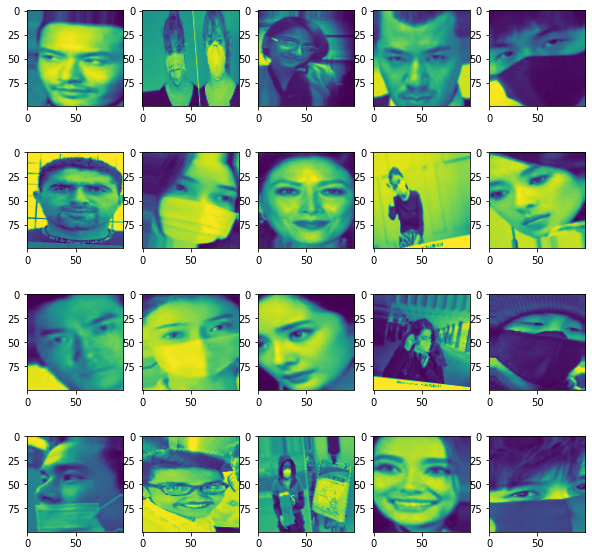

In [39]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [40]:
train_target.shape

(3048,)

In [41]:
from keras.utils import to_categorical

In [42]:
train_target=to_categorical(train_target)

In [43]:
test_target=to_categorical(test_target)

In [44]:
train_target.shape

(3048, 2)

In [45]:
test_features.shape

(762, 100, 100, 1)

In [46]:
test_target.shape

(762, 2)

In [47]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout


# Step 1: Specify the architecture

In [48]:
model=Sequential()
model.add(Conv2D(60,(5,5),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(Conv2D(30,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

# Step 2: Compile the model

In [49]:
from keras.optimizers import Adam

In [50]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: fit the model

In [51]:
train_features.shape

(3048, 100, 100, 1)

In [52]:
train_target.shape

(3048, 2)

In [ ]:
model.fit_generator(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
153/153 [==============================] - 173s 1s/step - loss: 0.6446 - accuracy: 0.6037
Epoch 2/20
153/153 [==============================] - 207s 1s/step - loss: 0.5810 - accuracy: 0.6824
Epoch 3/20
153/153 [==============================] - 193s 1s/step - loss: 0.5395 - accuracy: 0.7103
Epoch 4/20
153/153 [==============================] - 196s 1s/step - loss: 0.4528 - accuracy: 0.7848
Epoch 5/20
153/153 [==============================] - 219s 1s/step - loss: 0.3791 - accuracy: 0.8396
Epoch 6/20
153/153 [==============================] - 174s 1s/step - loss: 0.3491 - accuracy: 0.8481
Epoch 7/20
153/153 [==============================] - 172s 1s/step - loss: 0.3005 - accuracy: 0.8707
Epoch 8/20
153/153 [==============================] - 176s 1s/step - loss: 0.3157 - accuracy: 0.8691
Epoch 9/20
153/153 [==============================] - 189s 1s/step - loss: 0.3038 - accuracy: 0.8688
Epoch 10/20
153

In [ ]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'without_mask'
    elif classNo == 1: return 'with_mask'

In [1]:
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('C:/Users/Lenovo/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('C:/Users/Lenovo/lena.png')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 10)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    face_img=gray[y:y+h,x:x+w]
# Display the output
cv2.imshow('img', face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
face_img.shape

In [ ]:
img=preprocessing(face_img)
cv2.imshow("Processed Image",face_img)
img=img.reshape(1,100,100,1)
cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
cv2.putText(imgOriginal,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
predictions=model.predict(img)
classIndex=model.predict_classes(img)
probabilityValue=np.amax(predictions)
if probabilityValue>0.75:
    cv2.putText(imgOriginal,str(classIndex) + " "+ str(getCalssName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
cv2.imshow("Result",imgOriginal)
cv2.waitKey(0)
cv2.destroyAllWindows()